In [ ]:
cd Featurebased

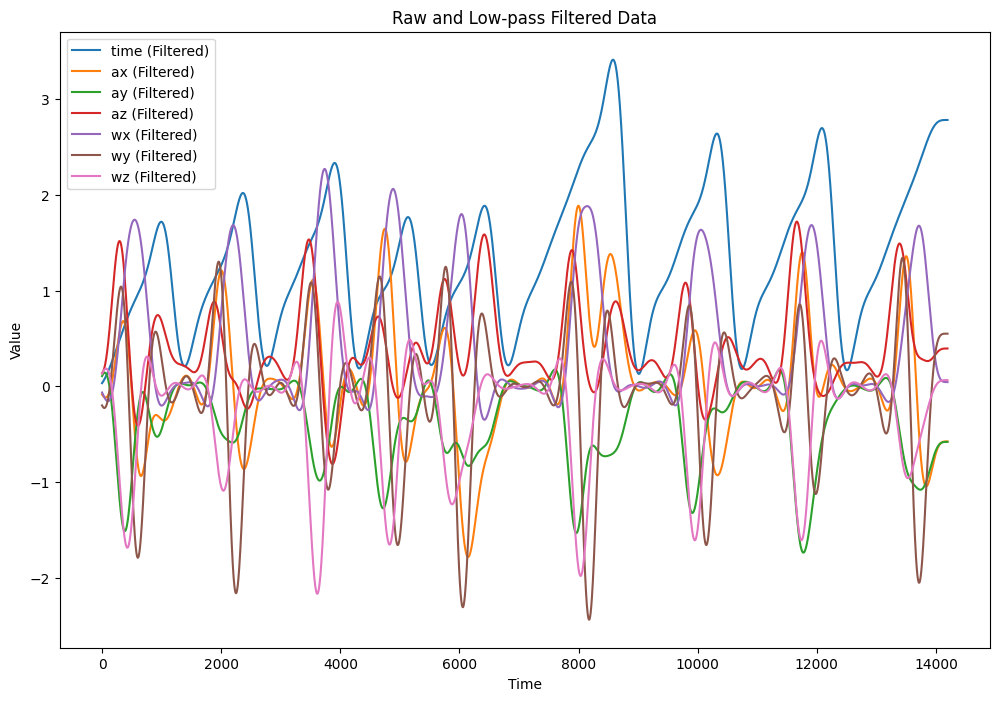

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Function to apply a low-pass Butterworth filter
def butter_lowpass_filter(data, cutoff_frequency, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Load the data into a pandas DataFrame
# Assuming your CSV files are named file1.csv, file2.csv, ..., file10.csv
file_prefix = ""
num_files = 9

# Create an empty DataFrame to store all the data
df_list = []

for i in range(1, num_files + 1):
    file_path = f"{file_prefix}{i}.csv"
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
full_data = pd.concat(df_list, ignore_index=True)

# Define the sampling rate and cutoff frequency for the low-pass filter
sampling_rate = 500  # Replace with your actual sampling rate (in Hz)
cutoff_frequency = 1  # Replace with your desired cutoff frequency (in Hz)

# Apply low-pass filter to each variable
filtered_data = full_data.copy()
for column in filtered_data.columns:
    filtered_data[column] = butter_lowpass_filter(full_data[column], cutoff_frequency, sampling_rate)

# Plot each individual variable
plt.figure(figsize=(12, 8))
for column in full_data.columns:
    #plt.plot(full_data.index, full_data[column], label=f"{column} (Raw)")
    plt.plot(filtered_data.index, filtered_data[column], label=f"{column} (Filtered)")

plt.title("Raw and Low-pass Filtered Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

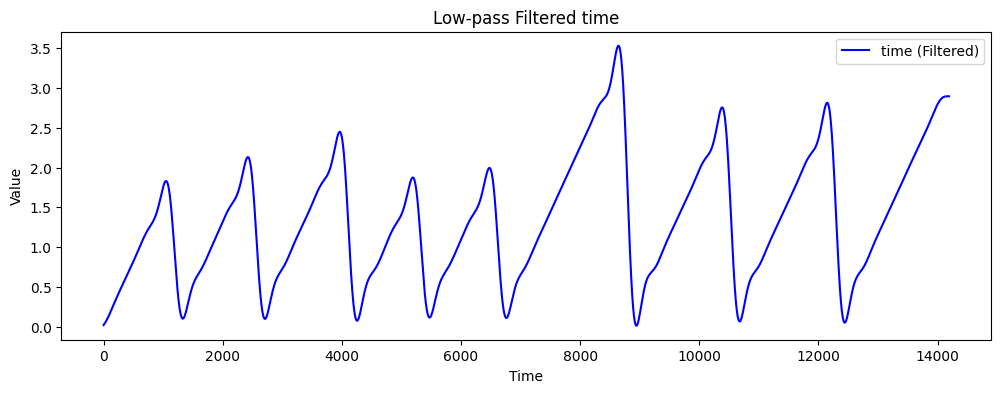

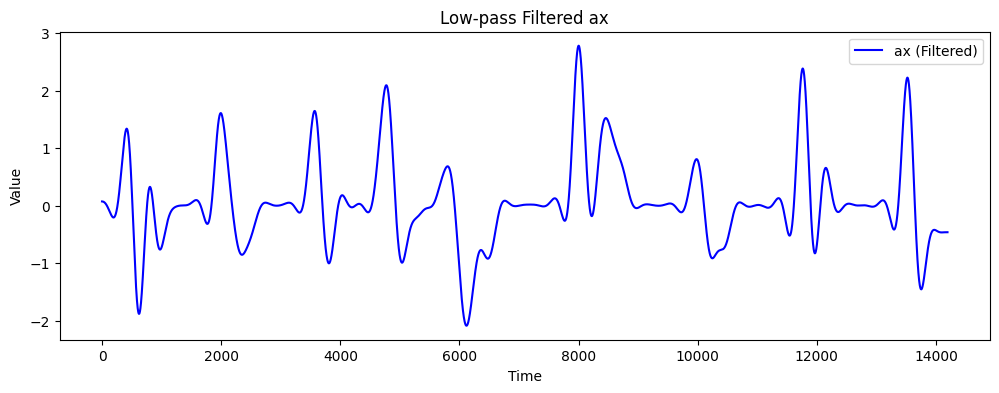

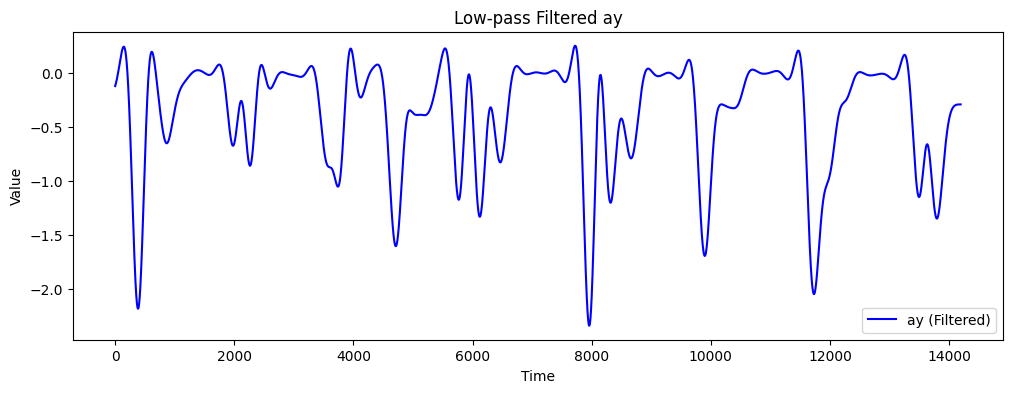

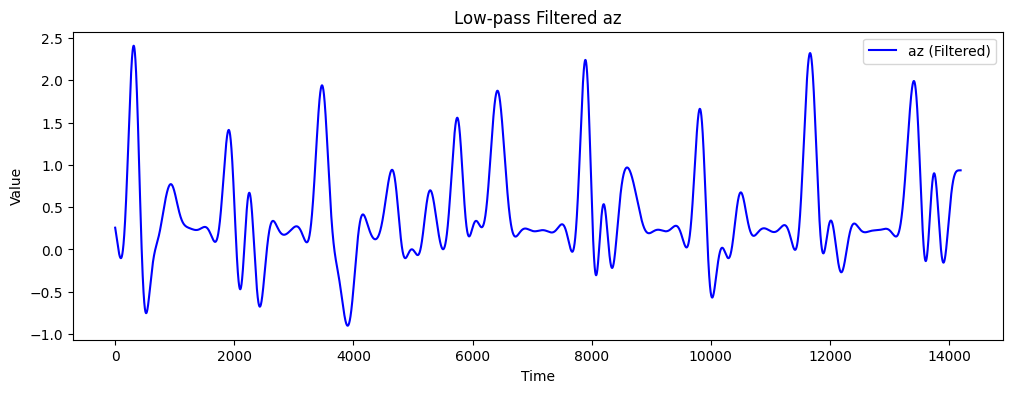

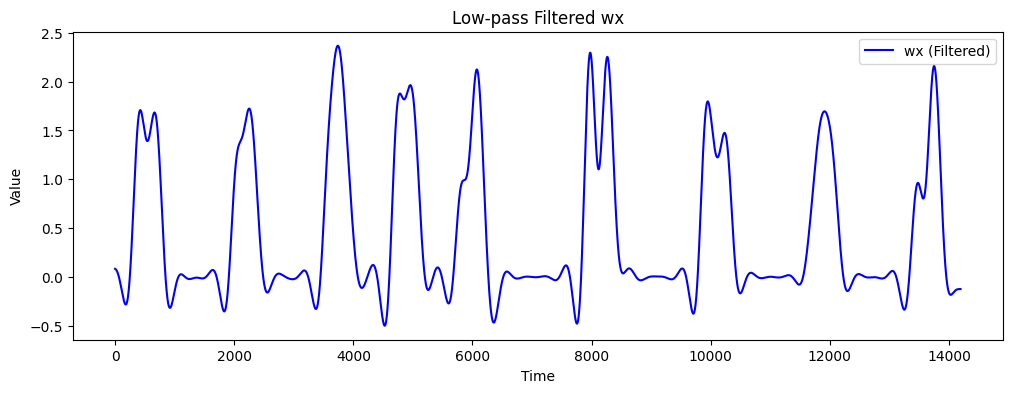

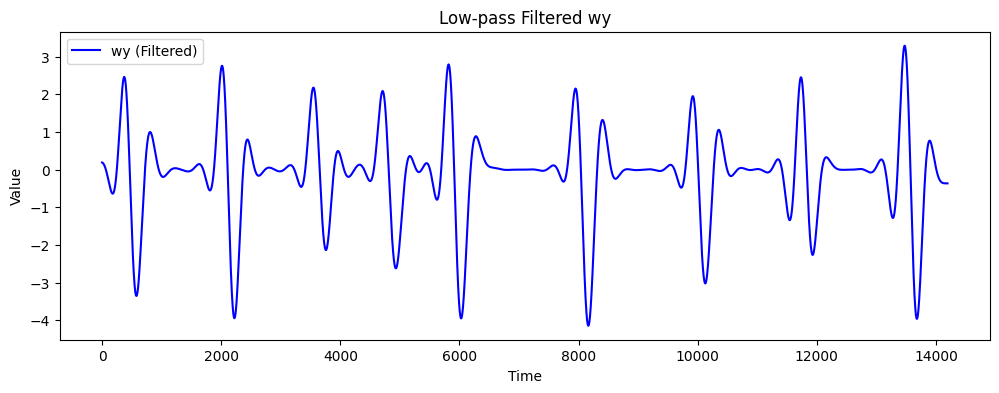

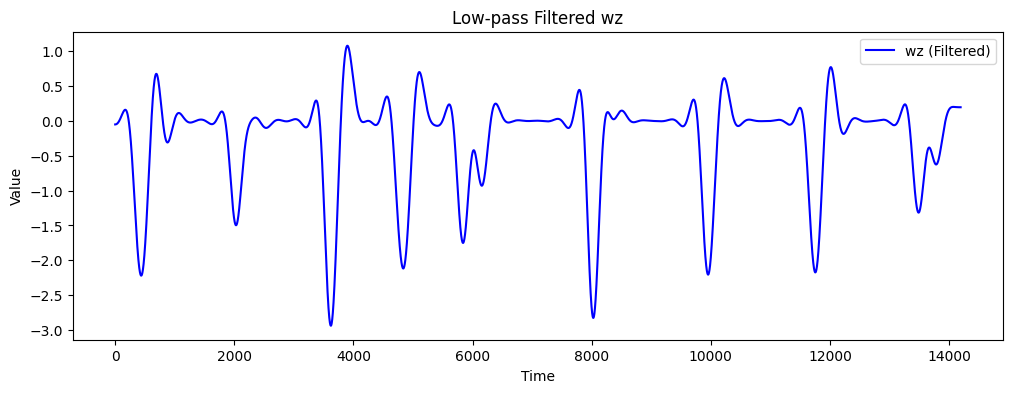

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Function to apply a low-pass Butterworth filter
def butter_lowpass_filter(data, cutoff_frequency, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Load the data into a pandas DataFrame
# Assuming your CSV files are named file1.csv, file2.csv, ..., file10.csv
file_prefix = ""
num_files = 9

# Create an empty DataFrame to store all the data
df_list = []

for i in range(1, num_files + 1):
    file_path = f"{file_prefix}{i}.csv"
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
full_data = pd.concat(df_list, ignore_index=True)

# Define the sampling rate and cutoff frequency for the low-pass filter
sampling_rate = 500  # Replace with your actual sampling rate (in Hz)
cutoff_frequency = 1.5  # Replace with your desired cutoff frequency (in Hz)

# Plot each variable separately with filtered data
for column in full_data.columns:
    plt.figure(figsize=(12, 4))

    # Apply low-pass filter to the current variable
    filtered_data = butter_lowpass_filter(full_data[column], cutoff_frequency, sampling_rate)

    plt.plot(full_data.index, filtered_data, label=f"{column} (Filtered)", color='blue')

    plt.title(f"Low-pass Filtered {column}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from scipy.integrate import trapz
from scipy.signal import find_peaks

# Function to extract features for a given variable
def extract_features(data):
    features = {}

    if len(data) > 0:
        # Mode
        features['mode'] = mode(data)

        # Median
        features['median'] = np.median(data)

        # Mean
        features['mean'] = np.mean(data)

        # Standard deviation
        features['std_dev'] = np.std(data)

        # Area under the curve using trapezoidal integration
        features['area_under_curve'] = trapz(data)

        # Positive-negative transitions
        transitions = np.diff(np.sign(data))
        features['positive_transitions'] = np.sum(transitions > 0)
        features['negative_transitions'] = np.sum(transitions < 0)

        # Max amplitude
        features['max_amplitude'] = np.max(np.abs(data))

        # Positive area under the curve
        features['positive_area'] = trapz(data[data > 0])

        # Negative area under the curve
        features['negative_area'] = trapz(data[data < 0])

        # Number of positive peaks
        positive_peaks, _ = find_peaks(data)
        features['num_positive_peaks'] = len(positive_peaks)

        # Number of negative peaks
        negative_peaks, _ = find_peaks(-data)
        features['num_negative_peaks'] = len(negative_peaks)

        # Minimum amplitude
        features['min_amplitude'] = np.min(data)
    else:
        # Set features to NaN if data is empty
        features = {
            'mode': np.nan,
            'median': np.nan,
            'mean': np.nan,
            'std_dev': np.nan,
            'area_under_curve': np.nan,
            'positive_transitions': np.nan,
            'negative_transitions': np.nan,
            'max_amplitude': np.nan,
            'positive_area': np.nan,
            'negative_area': np.nan,
            'num_positive_peaks': np.nan,
            'num_negative_peaks': np.nan,
            'min_amplitude': np.nan
        }

    return features

# Load the data into a pandas DataFrame
# Assuming your CSV files are named file1.csv, file2.csv, ..., file10.csv
file_prefix = "a"
num_files = 9

# Create an empty DataFrame to store all the data
df_list = []

for i in range(1, num_files + 1):
    file_path = f"{file_prefix}{i}.csv"
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
full_data = pd.concat(df_list, ignore_index=True)

# Define the sampling rate and cutoff frequency for the low-pass filter
sampling_rate = 500  # Replace with your actual sampling rate (in Hz)
cutoff_frequency = 3  # Replace with your desired cutoff frequency (in Hz)

# Apply low-pass filter to each variable
filtered_data = full_data.copy()
for column in filtered_data.columns:
    filtered_data[column] = butter_lowpass_filter(full_data[column], cutoff_frequency, sampling_rate)

# Extract features for each variable and each dataset
all_features = {}
for column in filtered_data.columns:
    variable_features = []
    for i in range(num_files):
        start_index = i * len(full_data) // num_files
        end_index = (i + 1) * len(full_data) // num_files
        data_slice = filtered_data[column][start_index:end_index]
        features = extract_features(data_slice)
        variable_features.append(features)

    all_features[column] = variable_features

# Display the extracted features
for column, features_list in all_features.items():
    print(f"\nVariable: {column}")
    for i, features in enumerate(features_list):
        print(f"Dataset {i + 1}: {features}")



Variable: time
Dataset 1: {'mode': ModeResult(mode=0.014662460490409058, count=1), 'median': 1.2561023904604598, 'mean': 1.2557353993919222, 'std_dev': 0.7248995402689506, 'area_under_curve': 1926.318406164588, 'positive_transitions': 0, 'negative_transitions': 0, 'max_amplitude': 2.4562013435351697, 'positive_area': 1926.318406164588, 'negative_area': 0.0, 'num_positive_peaks': 0, 'num_negative_peaks': 0, 'min_amplitude': 0.014662460490409058}
Dataset 2: {'mode': ModeResult(mode=-0.06791493017437629, count=1), 'median': 1.262172274085461, 'mean': 1.282537553170284, 'std_dev': 0.7428557170673991, 'area_under_curve': 1967.6455566757074, 'positive_transitions': 1, 'negative_transitions': 1, 'max_amplitude': 2.8360961303669465, 'positive_area': 1969.422662611985, 'negative_area': -1.7744417208844685, 'num_positive_peaks': 1, 'num_negative_peaks': 1, 'min_amplitude': -0.06791493017437629}
Dataset 3: {'mode': ModeResult(mode=-0.04441060129668799, count=1), 'median': 1.262291810304941, 'mea

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


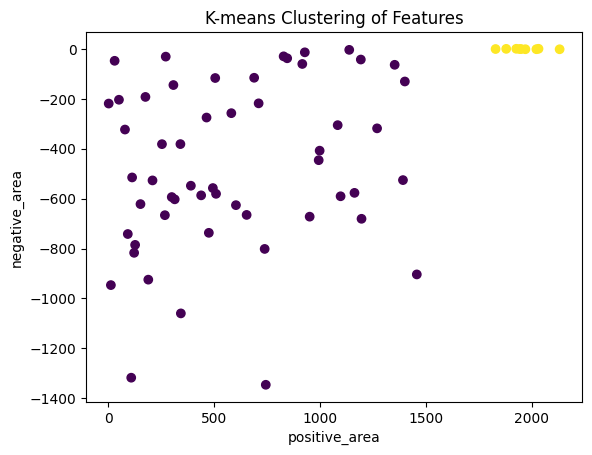

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Convert the features to a DataFrame
features_list = []

for column, features_list_per_variable in all_features.items():
    for i, features in enumerate(features_list_per_variable):
        features['variable'] = column
        features['dataset'] = i + 1
        features_list.append(features)

features_df = pd.DataFrame(features_list)

# Drop NaN values if any
features_df = features_df.dropna()

# Select relevant features (you may choose different features based on your problem)
selected_features = ['positive_area', 'negative_area', 'num_positive_peaks', 'num_negative_peaks']

# Standardize the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df[selected_features])

# Apply K-means clustering
num_clusters = 2  # Adjust the number of clusters based on your problem
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
features_df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters (for two selected features)
plt.scatter(features_df[selected_features[0]], features_df[selected_features[1]], c=features_df['cluster'], cmap='viridis')
plt.title('K-means Clustering of Features')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import mode
from scipy.integrate import trapz
from scipy.signal import find_peaks
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Function to extract features for a given variable
def extract_features(data):
    features = {}

    if len(data) > 0:
        # Mode
        features['mode'] = mode(data)[0]

        # Median
        features['median'] = np.median(data)

        # Mean
        features['mean'] = np.mean(data)

        # Standard deviation
        features['std_dev'] = np.std(data)

        # Area under the curve using trapezoidal integration
        features['area_under_curve'] = trapz(data)

        # Positive-negative transitions
        transitions = np.diff(np.sign(data))
        features['positive_transitions'] = np.sum(transitions > 0)
        features['negative_transitions'] = np.sum(transitions < 0)

        # Max amplitude
        features['max_amplitude'] = np.max(np.abs(data))

        # Positive area under the curve
        features['positive_area'] = trapz(data[data > 0])

        # Negative area under the curve
        features['negative_area'] = trapz(data[data < 0])

        # Number of positive peaks
        positive_peaks, _ = find_peaks(data)
        features['num_positive_peaks'] = len(positive_peaks)

        # Number of negative peaks
        negative_peaks, _ = find_peaks(-data)
        features['num_negative_peaks'] = len(negative_peaks)

        # Minimum amplitude
        features['min_amplitude'] = np.min(data)
    else:
        # Set features to NaN if data is empty
        features = {
            'mode': np.nan,
            'median': np.nan,
            'mean': np.nan,
            'std_dev': np.nan,
            'area_under_curve': np.nan,
            'positive_transitions': np.nan,
            'negative_transitions': np.nan,
            'max_amplitude': np.nan,
            'positive_area': np.nan,
            'negative_area': np.nan,
            'num_positive_peaks': np.nan,
            'num_negative_peaks': np.nan,
            'min_amplitude': np.nan
        }

    return features

# Function to load a new dataset
def load_new_dataset(file_prefix, num_files):
    df_list = []

    for i in range(1, num_files + 1):
        file_path = f"{file_prefix}{i}.csv"
        df = pd.read_csv(file_path)
        df_list.append(df)

    new_full_data = pd.concat(df_list, ignore_index=True)
    return new_full_data

# Load the new dataset
file_prefix_new = "a"
num_files_new = 3  # Update with the actual number of new files
new_full_data = load_new_dataset(file_prefix_new, num_files_new)

# Define the sampling rate and cutoff frequency for the low-pass filter
sampling_rate_new = 500  # Replace with your actual sampling rate (in Hz)
cutoff_frequency_new = 3  # Replace with your desired cutoff frequency (in Hz)

# Apply low-pass filter to each variable in the new dataset
filtered_new_data = new_full_data.copy()
for column in filtered_new_data.columns:
    filtered_new_data[column] = butter_lowpass_filter(new_full_data[column], cutoff_frequency_new, sampling_rate_new)

# Extract features for each variable and each dataset in the new dataset
all_features_new = {}
for column in filtered_new_data.columns:
    variable_features = []
    for i in range(num_files_new):
        start_index = i * len(new_full_data) // num_files_new
        end_index = (i + 1) * len(new_full_data) // num_files_new
        data_slice = filtered_new_data[column][start_index:end_index]
        features = extract_features(data_slice)
        variable_features.append(features)

    all_features_new[column] = variable_features

# Convert the features of the new dataset to the appropriate format
new_features_list = []

for column, features_list_per_variable in all_features_new.items():
    for i, features in enumerate(features_list_per_variable):
        features['variable'] = column
        features['dataset'] = i + 1
        new_features_list.append(features)

new_features_df = pd.DataFrame(new_features_list)
print(new_features_df)
# Drop NaN values if any
new_features_df = new_features_df.dropna()
print(new_features_df)
# Select relevant features for the new dataset
selected_features = [
    'mode', 'median', 'mean', 'std_dev', 'area_under_curve',
    'positive_transitions', 'negative_transitions', 'max_amplitude',
    'positive_area', 'negative_area', 'num_positive_peaks',
    'num_negative_peaks', 'min_amplitude'
]

# Standardize the selected features for the new dataset
scaled_features = scaler.fit_transform(new_features_df[selected_features])
num_clusters = 2  # Adjust the number of clusters based on your problem
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
features_df['cluster'] = kmeans.fit(scaled_features)

# Predict clusters using the trained K-means model
new_features_df['predicted_cluster'] = kmeans.predict(new_features_df.drop(['variable','dataset'], axis=1))

# Display the predicted clusters for the new dataset
print(new_features_df[['variable', 'dataset', 'predicted_cluster']])


        mode        median      mean   std_dev  area_under_curve  \
0   0.014662  1.354642e+00  1.358741  0.790073       2247.427979   
1  -0.067915  1.281158e+00  1.279485  0.714828       2116.196639   
2  -0.044411  1.438161e+00  1.431109  0.789855       2368.491377   
3  -1.512460  5.148529e-03 -0.079260  0.371793       -131.198554   
4  -1.399861  1.147167e-02  0.171155  0.895300        283.256402   
5  -2.647289 -7.423830e-03 -0.132204  1.231091       -218.407665   
6  -5.153788 -1.365299e-02 -0.567783  1.338307       -939.901867   
7  -4.849770 -1.069096e-02 -0.381755  1.235134       -632.046368   
8  -7.148031 -1.208215e-02 -0.671375  1.861936      -1111.715237   
9  -0.135553  2.078684e-01  0.859619  1.536448       1420.847496   
10 -5.898636  2.071869e-01  0.291491  1.984176        480.635407   
11 -8.707021  2.110237e-01  0.376144  2.788907        622.509218   
12 -0.204194  3.474579e-04  0.566623  1.146877        937.748533   
13 -1.107367  6.843450e-04  0.469016  1.231141  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   variable  dataset  predicted_cluster
0      time        1                  1
1      time        2                  1
2      time        3                  1
3        ax        1                  0
4        ax        2                  1
5        ax        3                  0
6        ay        1                  0
7        ay        2                  0
8        ay        3                  0
9        az        1                  1
10       az        2                  1
11       az        3                  1
12       wx        1                  1
13       wx        2                  1
14       wx        3                  1
15       wy        1                  0
16       wy        2                  0
17       wy        3                  0
18       wz        1                  0
19       wz        2                  0
20       wz        3                  0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
